In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
# Definitions of many functions 

In [6]:
# Definition of a distance funtion

def d(R,i,j):
  d = (R[0,i]-R[0,j])**2 + (R[1,i]-R[1,j])**2 +(R[2,i]-R[2,j])**2
  return d

In [7]:
# Definition of the Wavefunction

def WF(R, Par):
  wf = 1
  for i in range(0,A-1):
    for j in range(i+1,A):
      wf = wf * (math.exp(-Par[0]*d(R,i,j))+Par[1]*math.exp(-Par[2]*d(R,i,j)))
  #print("Eigenfunction value is = ", wf)     
  return wf 

In [8]:
# Definition and Computation of the Local Energy

def V(R):
  V = 0
  for i in range(0,A-1):
    for j in range(i+1,A):
      V = V + 1000*math.exp(-3*d(R,i,j))-165.35*math.exp(-1.05*d(R,i,j))-21.5*math.exp(-0.6*d(R,i,j))-83*math.exp(-0.8*d(R,i,j))-11.5*math.exp(-0.4*d(R,i,j))
  return V

In [9]:
# Derivative of WF, h is the increment

def Diff (R, i, j, h, Par):
  R_P = R.copy()
  R_M = R.copy()
  R_P[i,j] = R[i,j]+h
  R_M[i,j] = R[i,j]-h
  return (WF(R_P, Par)+WF(R_M, Par)-2*WF(R, Par))/h**2 

#K is the kinetic term?
def K(R, Par):
  K = 0 
  for j in range(0,A):
    for i in range(0,3):
      K = K + Diff(R, i, j, h, Par )*C
  return K

In [10]:
# Some Initializations

NA = 0 # Accepted moves
NP = 300  # Number of moves to find parameters  (300)
NM = 1000  # Number of particles' moves   (10000)
A = 4   # Numbers of nucleons
h = 0.00001  # Differential Increment 
step = 0.55  # Algorithm step for R
hbar = 6.582119*10**(-22)
C = (197.3269804)**2/2/939.56542052 # Constant in frontof the kinetic term, the first term is in Mev*fm
step1 = 1/100
step2 = 1/20
step3 = 1/10
list_gamma = []
list_a  = []
list_beta = []
list_E = []
list_EvalE = []

In [11]:
# Definition of the form factor function and its variational parameters

# gamma = 0.08597 
# a = -0.7191 
# beta = 2.13796 gamma+beta of Guardiola

In [12]:
# Parameters' list

BestPars = [0.08597 , -0.7191 , 2.13796 ]  #sono gamma, a e beta!!

Bestpars = np.array(BestPars)

Pars = [0.2, -0.2, 1] #Questi cosa sono? come mai vengono usati nella WF al posto di gamma, a e beta? 

Par = np.array(Pars)

Par_new = np.zeros(3)

In [13]:
# List for a particle's coordinates

R = (np.random.rand(3,A)-0.5)*10*step   #Coordinates Matrix

In [14]:
print(R)

[[ 0.07298513  2.43233991 -1.45053711  0.50022078]
 [-0.48786272  1.60799175 -1.46554814 -2.54282321]
 [ 2.49561771 -1.03995981  1.11283438 -1.58697357]]


In [15]:
# Coordinates list 'Metropolized', not properly, because now the thing that's variating are
#the parameters and not the R matricies

list_R = []
list_R.append(R)
E_ltotal=0
E_lacc=0
NA=0
for k in range(0,NM):
    R_new = R.copy() + step*(np.random.rand(3,A)-0.5)
    if ((WF(R_new, Bestpars)/WF(R, Bestpars))**2>1 or (WF(R_new, Bestpars)/WF(R, Bestpars))**2 > np.random.rand() ):
        R = R_new.copy()
        list_R.append(R)
        NA = NA +1
        E_lacc=E_lacc + V(R) - (K(R,Bestpars)/WF(R,Bestpars))
    else:
        R = R.copy()
        list_R.append(R)
        
    E_ltotal=E_ltotal + V(R) - (K(R,Bestpars)/WF(R,Bestpars))
    
#cosa accade qui?
#nell'if R viene aggiornata e quella nuova generata viene aggiunta in coda alla precedente, creando una matrice
#identità a blocchi, dove lungo la diagonale ci sono le metricine R, nient'altro intorno.
#altrimenti non fa nulla e riaggiunge in coda la matricina precedente.
#WF è il solito pdf di riferimento per il metropolis hasting algoritm.
#PLOTTA PER FAVORE QUALCOSA DI QUESTA MATRICE R CHE MI INTERESSA VEDERE CHE FA!!!!

In [16]:
print(R)

[[-0.87355905  0.49792203  1.44689977  0.77208425]
 [-1.5194956  -0.98364314 -0.7393663  -1.63030299]
 [ 0.16976663  1.67806322  1.38149339  2.63127069]]


In [48]:
print(E_ltotal/NM) #---->> con NM=10000 dà '-24.4459511..'
print(E_lacc/NA)

-23.322152932994403
-23.496398600561772


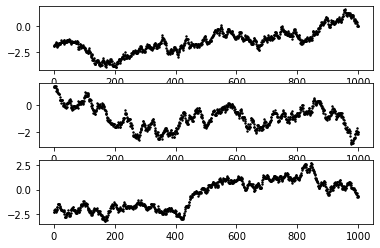

In [36]:
fig , ax =plt.subplots(3)
for i in range(0,len(list_R)):
        ax[0].scatter(i, list_R[i][0,1],s=2,color='black')
        ax[1].scatter(i, list_R[i][1,1],s=2,color='black')
        ax[2].scatter(i, list_R[i][2,1],s=2,color='black')
        
        

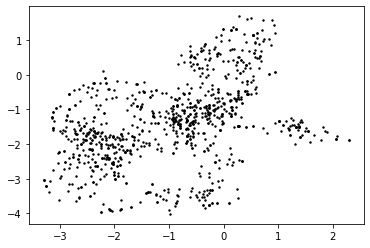

In [37]:
fig , ax =plt.subplots()
for i in range(0,len(list_R)):
        ax.scatter(list_R[i][0,0], list_R[i][0,1],s=2,color='black')

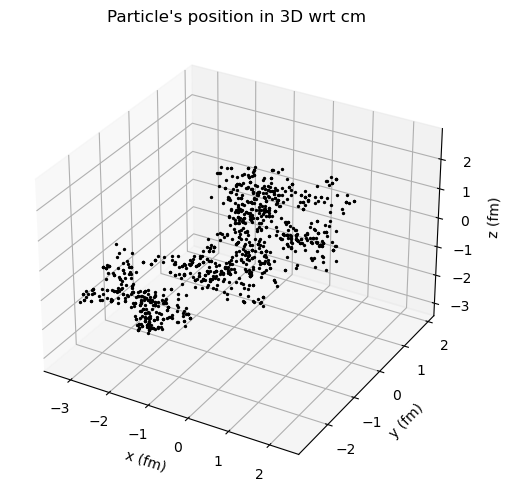

In [38]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(projection='3d')
for i in range(0,len(list_R)):
    ax.scatter(list_R[i][0,0], list_R[i][1,0], list_R[i][2,0], s=2 , c="black")  #ALso with s=6 is not bad
plt.xlabel('x (fm)')
plt.ylabel('y (fm)')
ax.set_zlabel('z (fm)')
plt.title("Particle's position in 3D wrt cm")
plt.show()

In [49]:
print("Acceptance ratio =", 100*NA/NM)
#print(list_R)

Acceptance ratio = 76.2


In [40]:
#RIFALLO CON PARAMETRI FISSI E R VARIABILE
for l in range(0,NP):
    Par_new[0] = Par[0].copy() + (np.random.rand()-0.5)*step1
    Par_new[1] = Par[1].copy() + (np.random.rand()-0.5)*step2
    Par_new[2] = Par[2].copy() + (np.random.rand()-0.5)*step3
    E_loc = 0
    D = 0
    for j in range(0,NM):
        E_loc = E_loc + V(list_R[j])*(WF(list_R[j], Par_new)/WF(list_R[j], Bestpars))**2 - K(list_R[j], Par_new)*WF(list_R[j], Par_new)/WF(list_R[j], Bestpars)**2 # Modify how the parameters arrive   
        D = D + (WF(list_R[j], Par_new)/WF(list_R[j], Bestpars))**2
    
    #Ora E_loc appare essere tutta moltiplicata per una WF rispetto all'altro file..perchè?
    #Prova a plottare D e cerca di capire che cazzo fa.
    #In un certo senso questo algoritmo contempla solo la riduzione dell'energia media
    #fino al raggiungimento del minimo dell'energia.
    #In teoria ad un certo punto non dovrebbe più diminuire quando raggiunge i parametri
    # corretti per il minimo.
    
    E_mean = E_loc/D #Perchè pesata su D? che senso ha?  #APRI DIFFUSION MODEL L'HO SCRITTO

    if (l==0):
        Par = Par_new.copy()  
        list_gamma.append(Par[0])
        list_a.append(Par[1])
        list_beta.append(Par[2])
        list_E.append(E_mean)
        list_EvalE.append(E_mean)
        print("\nHI THERE, LET'S BEGIN!!", "\n (nico)The mean value of the energy initially is: ", E_mean, "\nWith pars:","\nGamma = ",list_gamma[l],"\na = ",list_a[l],"\nbeta = ",list_beta[l])
  
    else:   
        print("l = ", l) 
        if (list_EvalE[l-1]>E_mean):    #ma quando cazzo viene uplodata list_EvalE???
            Par = Par_new.copy()
            list_gamma.append(Par[0])
            list_a.append(Par[1])
            list_beta.append(Par[2])
            list_EvalE.append(E_mean)
            list_E.append(E_mean)
            print("Accepted!\nE_mean =", E_mean, "\nWith pars:","\nGamma = ",list_gamma[-1],"\na = ",list_a[-1],"\nbeta = ",list_beta[-1])
        else:
            Par = Par.copy()
            list_EvalE.append(list_EvalE[l-1])
            
#Se il numero dell'energia 'EvalE' precedente all'indice corrente è maggiore di 'E_mean'
#allora entri nell'if Accepted.
#'EvalE' e 'E_mean' sono di fatto la stessa lista, ma Eval serve solo per controllare
#E_mean(?)
#Altrimenti nell'else copio i parametri del ciclo precedente e poi appendo a 'EvalE' il 
#suo valore precedente che poi andrà di nuovo ad essere confrontato con un nuovo
#valore di E_mean. Questo è l'unico punto in cuo viene aggiornato solo 'EvalE'


HI THERE, LET'S BEGIN!! 
 (nico)The mean value of the energy initially is:  108.73344418353439 
With pars: 
Gamma =  0.20056544686208452 
a =  -0.21080510575779016 
beta =  0.9811844461977139
l =  1
Accepted!
E_mean = 104.68205026648728 
With pars: 
Gamma =  0.20206786380213226 
a =  -0.23335676177666953 
beta =  1.0262250541097373
l =  2
Accepted!
E_mean = 99.67667524538966 
With pars: 
Gamma =  0.20296470897907365 
a =  -0.25190432620184067 
beta =  1.0314247752456336
l =  3
l =  4
l =  5
Accepted!
E_mean = 93.43533585291706 
With pars: 
Gamma =  0.19966618477096912 
a =  -0.25257293202073083 
beta =  1.0329114895617157
l =  6
l =  7
Accepted!
E_mean = 84.27633842421483 
With pars: 
Gamma =  0.19774459227218652 
a =  -0.2651072053913027 
beta =  1.0056808518670117
l =  8
l =  9
Accepted!
E_mean = 77.07253679125526 
With pars: 
Gamma =  0.19804266978462745 
a =  -0.2859654943949013 
beta =  1.0045896048501162
l =  10
l =  11
l =  12
Accepted!
E_mean = 75.3423690096332 
With pars: 
Ga

l =  110
l =  111
l =  112
l =  113
l =  114
l =  115
Accepted!
E_mean = -27.95271312169201 
With pars: 
Gamma =  0.14188269673193596 
a =  -0.5759997623677774 
beta =  0.8768710115640771
l =  116
l =  117
l =  118
l =  119
l =  120
l =  121
l =  122
l =  123
l =  124
l =  125
Accepted!
E_mean = -27.959516882300324 
With pars: 
Gamma =  0.1442082091725216 
a =  -0.5911343241719387 
beta =  0.911846188202392
l =  126
l =  127
l =  128
l =  129
l =  130
l =  131
l =  132
l =  133
Accepted!
E_mean = -27.99040894532397 
With pars: 
Gamma =  0.14218636490659708 
a =  -0.585041586462168 
beta =  0.9255298358788991
l =  134
l =  135
Accepted!
E_mean = -27.99689348291573 
With pars: 
Gamma =  0.13882895988393928 
a =  -0.5864191605052511 
beta =  0.924371604435755
l =  136
l =  137
l =  138
Accepted!
E_mean = -28.02415340947361 
With pars: 
Gamma =  0.13621257365776557 
a =  -0.5877818577730674 
beta =  0.9690070769156504
l =  139
l =  140
Accepted!
E_mean = -28.056370796449897 
With pars: 
Ga

l =  279
l =  280
Accepted!
E_mean = -79.80030496214526 
With pars: 
Gamma =  0.0471160875629195 
a =  -0.7533982587025475 
beta =  1.0500227855365047
l =  281
l =  282
l =  283
l =  284
l =  285
Accepted!
E_mean = -82.18298639391423 
With pars: 
Gamma =  0.046049313728227036 
a =  -0.7670437450743384 
beta =  1.0354787190986812
l =  286
l =  287
Accepted!
E_mean = -85.12196675157504 
With pars: 
Gamma =  0.044740203880478106 
a =  -0.7919134144858209 
beta =  1.064204657843991
l =  288
Accepted!
E_mean = -87.12619633738943 
With pars: 
Gamma =  0.047607040240211014 
a =  -0.8066789946764015 
beta =  1.0448044932779075
l =  289
Accepted!
E_mean = -89.60303633592606 
With pars: 
Gamma =  0.048027203023927226 
a =  -0.8185636106757866 
beta =  1.0077451358038323
l =  290
l =  291
l =  292
l =  293
l =  294
l =  295
Accepted!
E_mean = -94.08652459362096 
With pars: 
Gamma =  0.04517448533866656 
a =  -0.8390847330428695 
beta =  1.0264909897472851
l =  296
Accepted!
E_mean = -95.656496454

In [41]:
print("last values:", "\nGamma = ",list_gamma[-1],"\na = ",list_a[-1],"\nbeta = ",list_beta[-1], "\nEnergy = ", list_E[-1])

last values: 
Gamma =  0.04656435117484945 
a =  -0.8866744657142339 
beta =  1.0959688887361423 
Energy =  -97.0975370140013


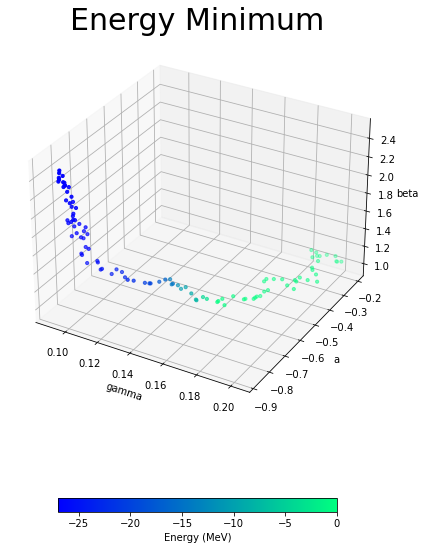

In [36]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
cmap = plt.cm.winter  #(plt.cm.cool)(RdBu)
img = ax.scatter(list_gamma, list_a, list_beta, s = 10, c=list_E, vmin = -27, vmax = 0, cmap = cmap)
cbar = fig.colorbar(img, label= "Energy (MeV)", shrink = 0.5, orientation = 'horizontal')
ax.set_xlabel('gamma')
ax.set_ylabel('a')
ax.set_zlabel('beta')
plt.title('Energy Minimum', fontsize = 30)
#img=ax.scatter(0.08,-0.74,2.1,color='red')
#plt.annotate("andamento ideale", xyz=(0.08,-0.74,2.1), arrowprops={'arrowstyle':'->'}, xyztext=(0.16,0.20,2.0))
plt.show()

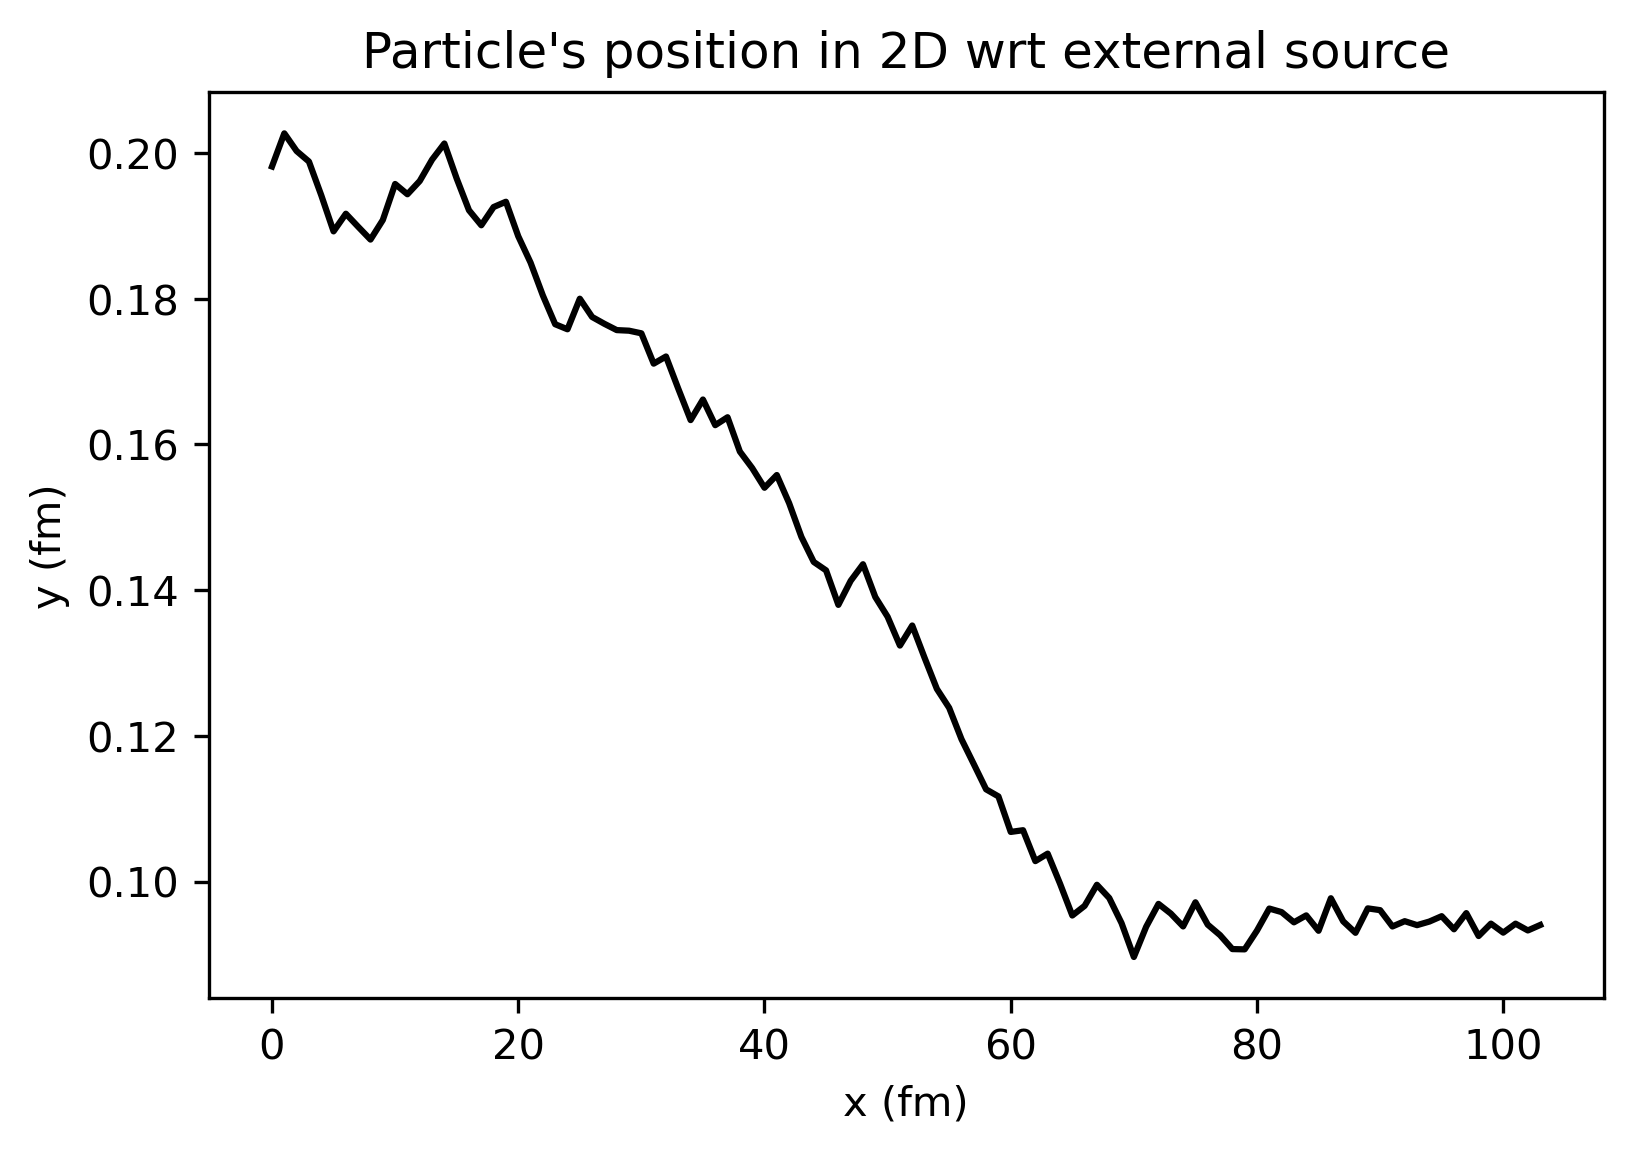

In [37]:
#-----Done by nico

fig, ax = plt.subplots(dpi=300)
variable=[]
for i in range(0,len(list_gamma)):
    variable.append(i)
ax.plot(variable,list_gamma, color='black')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
plt.title("Particle's position in 2D wrt external source")
plt.show()

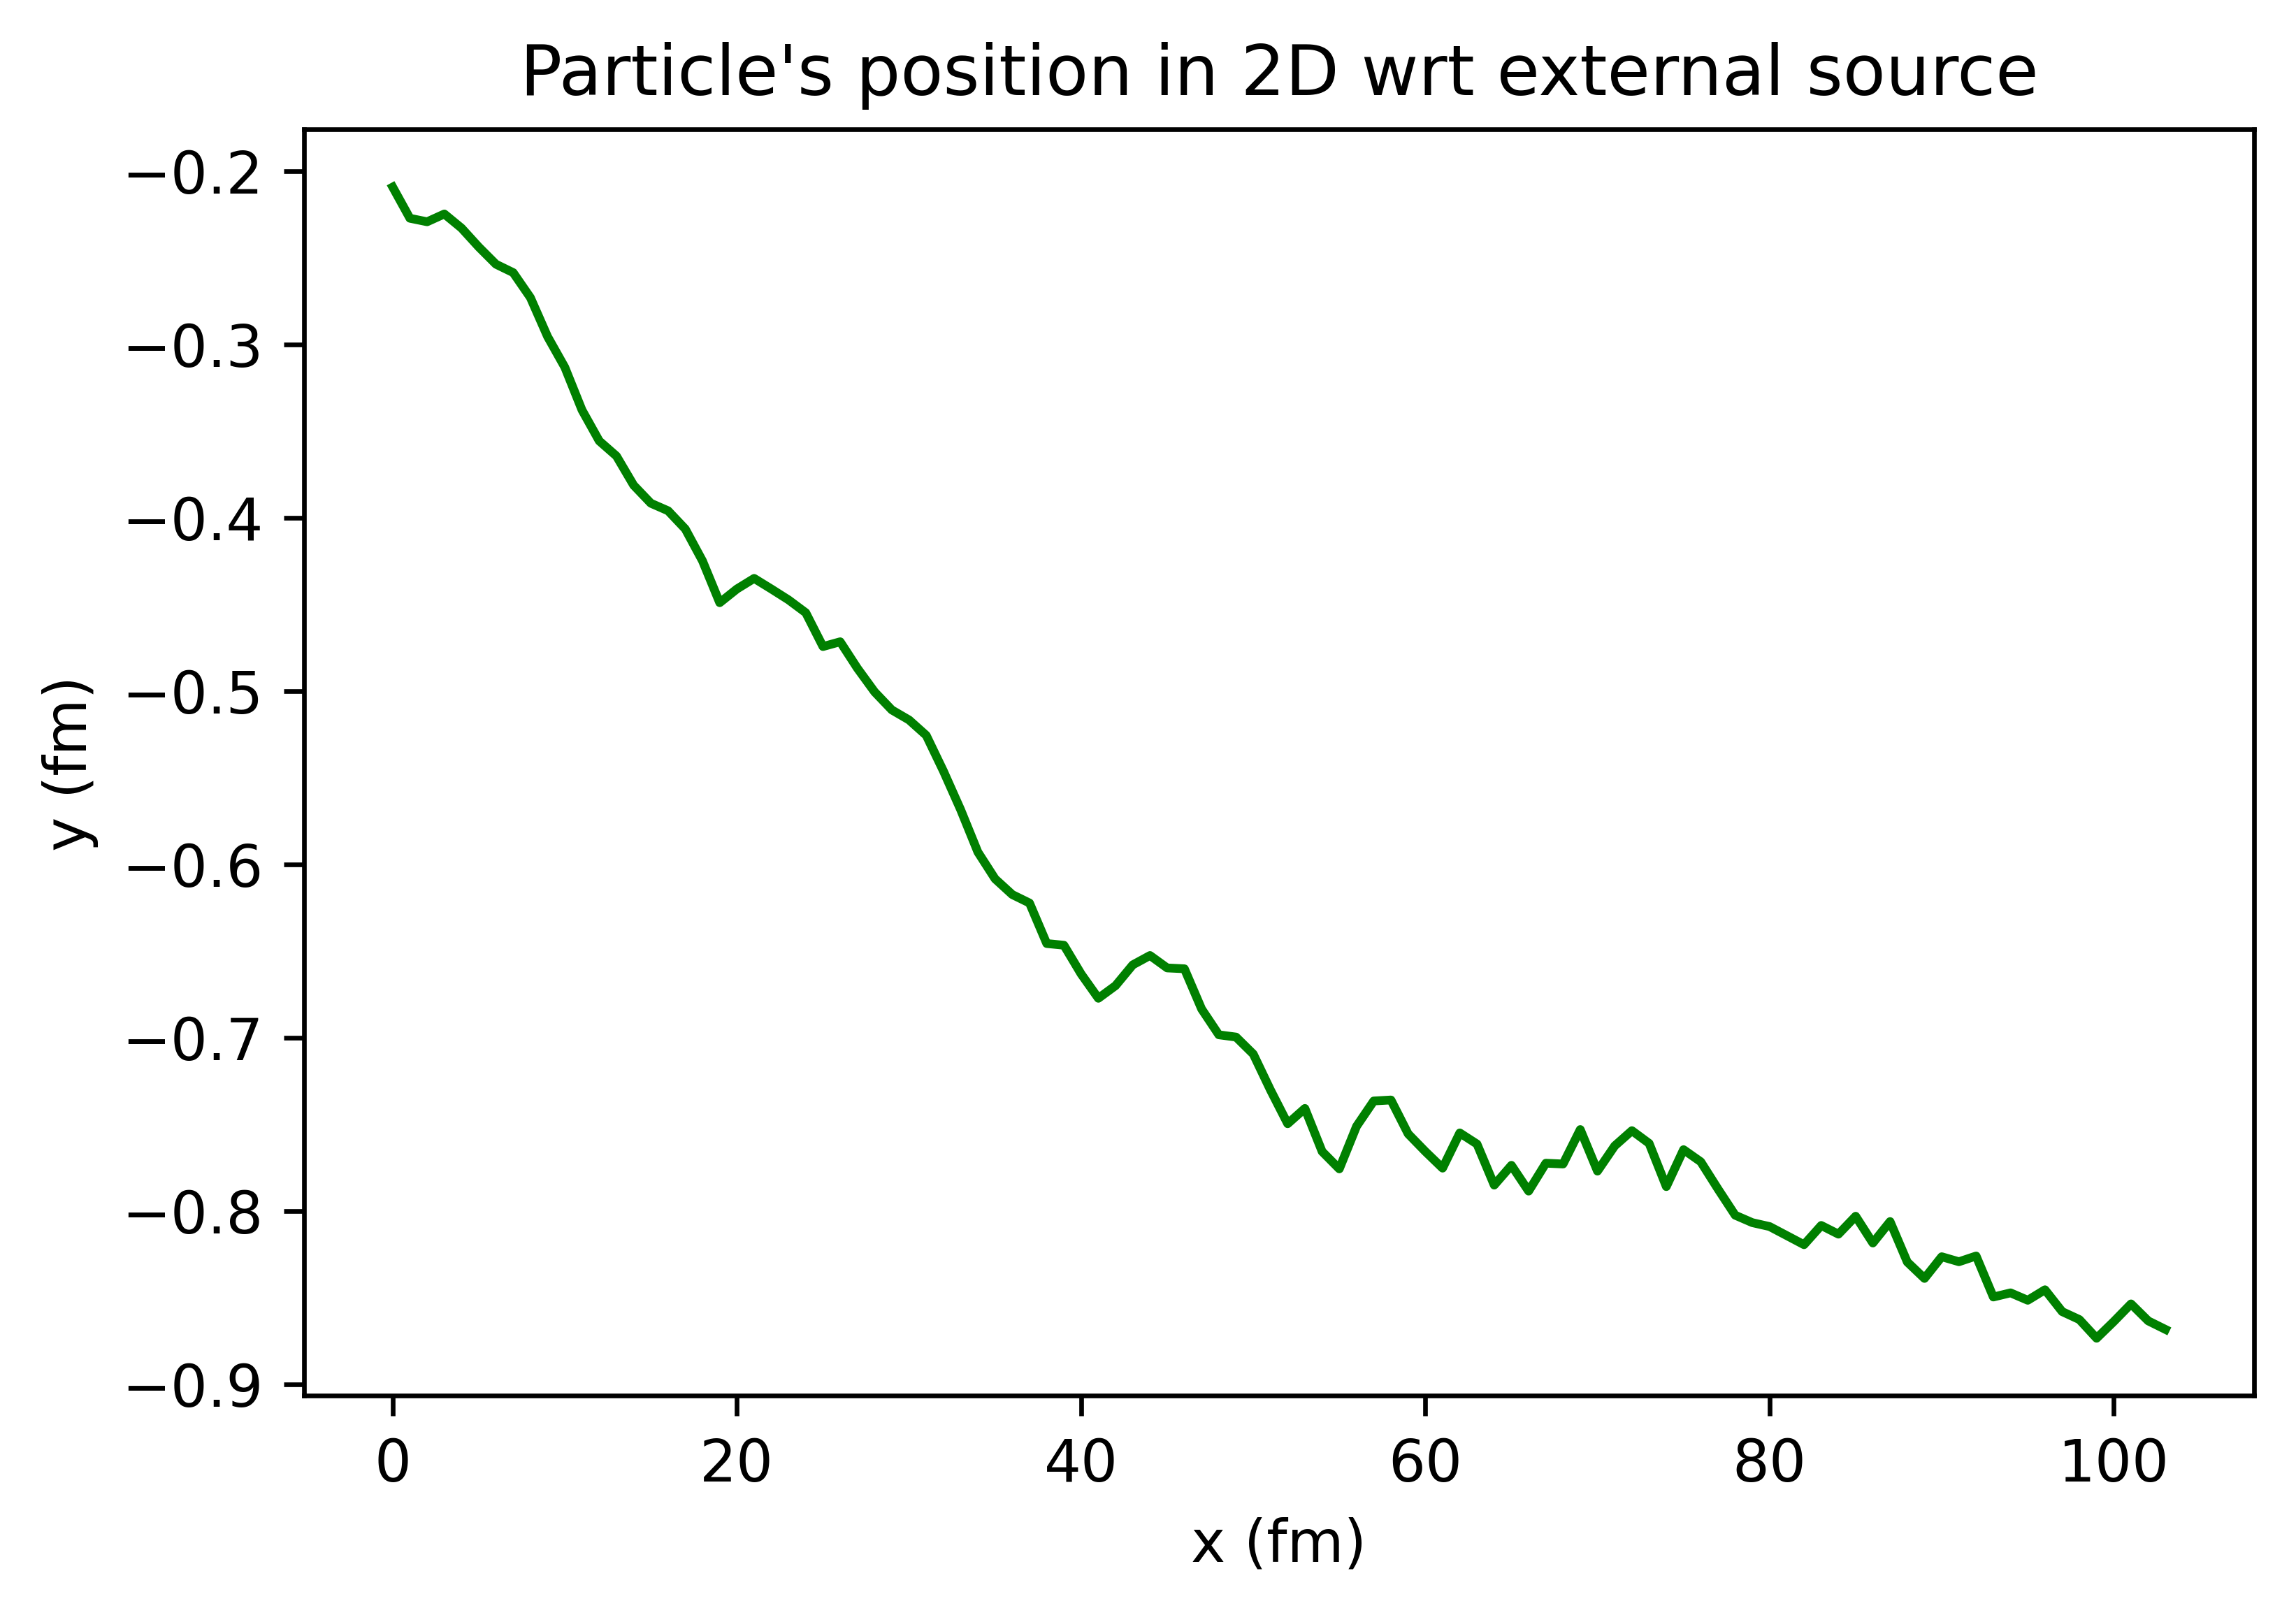

In [38]:
#-----Done by nico

fig, ax = plt.subplots( dpi=600)
variable1=[]
for i in range(0,len(list_a)):
    variable1.append(i)
ax.plot(variable1,list_a, 'green')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
plt.title("Particle's position in 2D wrt external source")
plt.show()

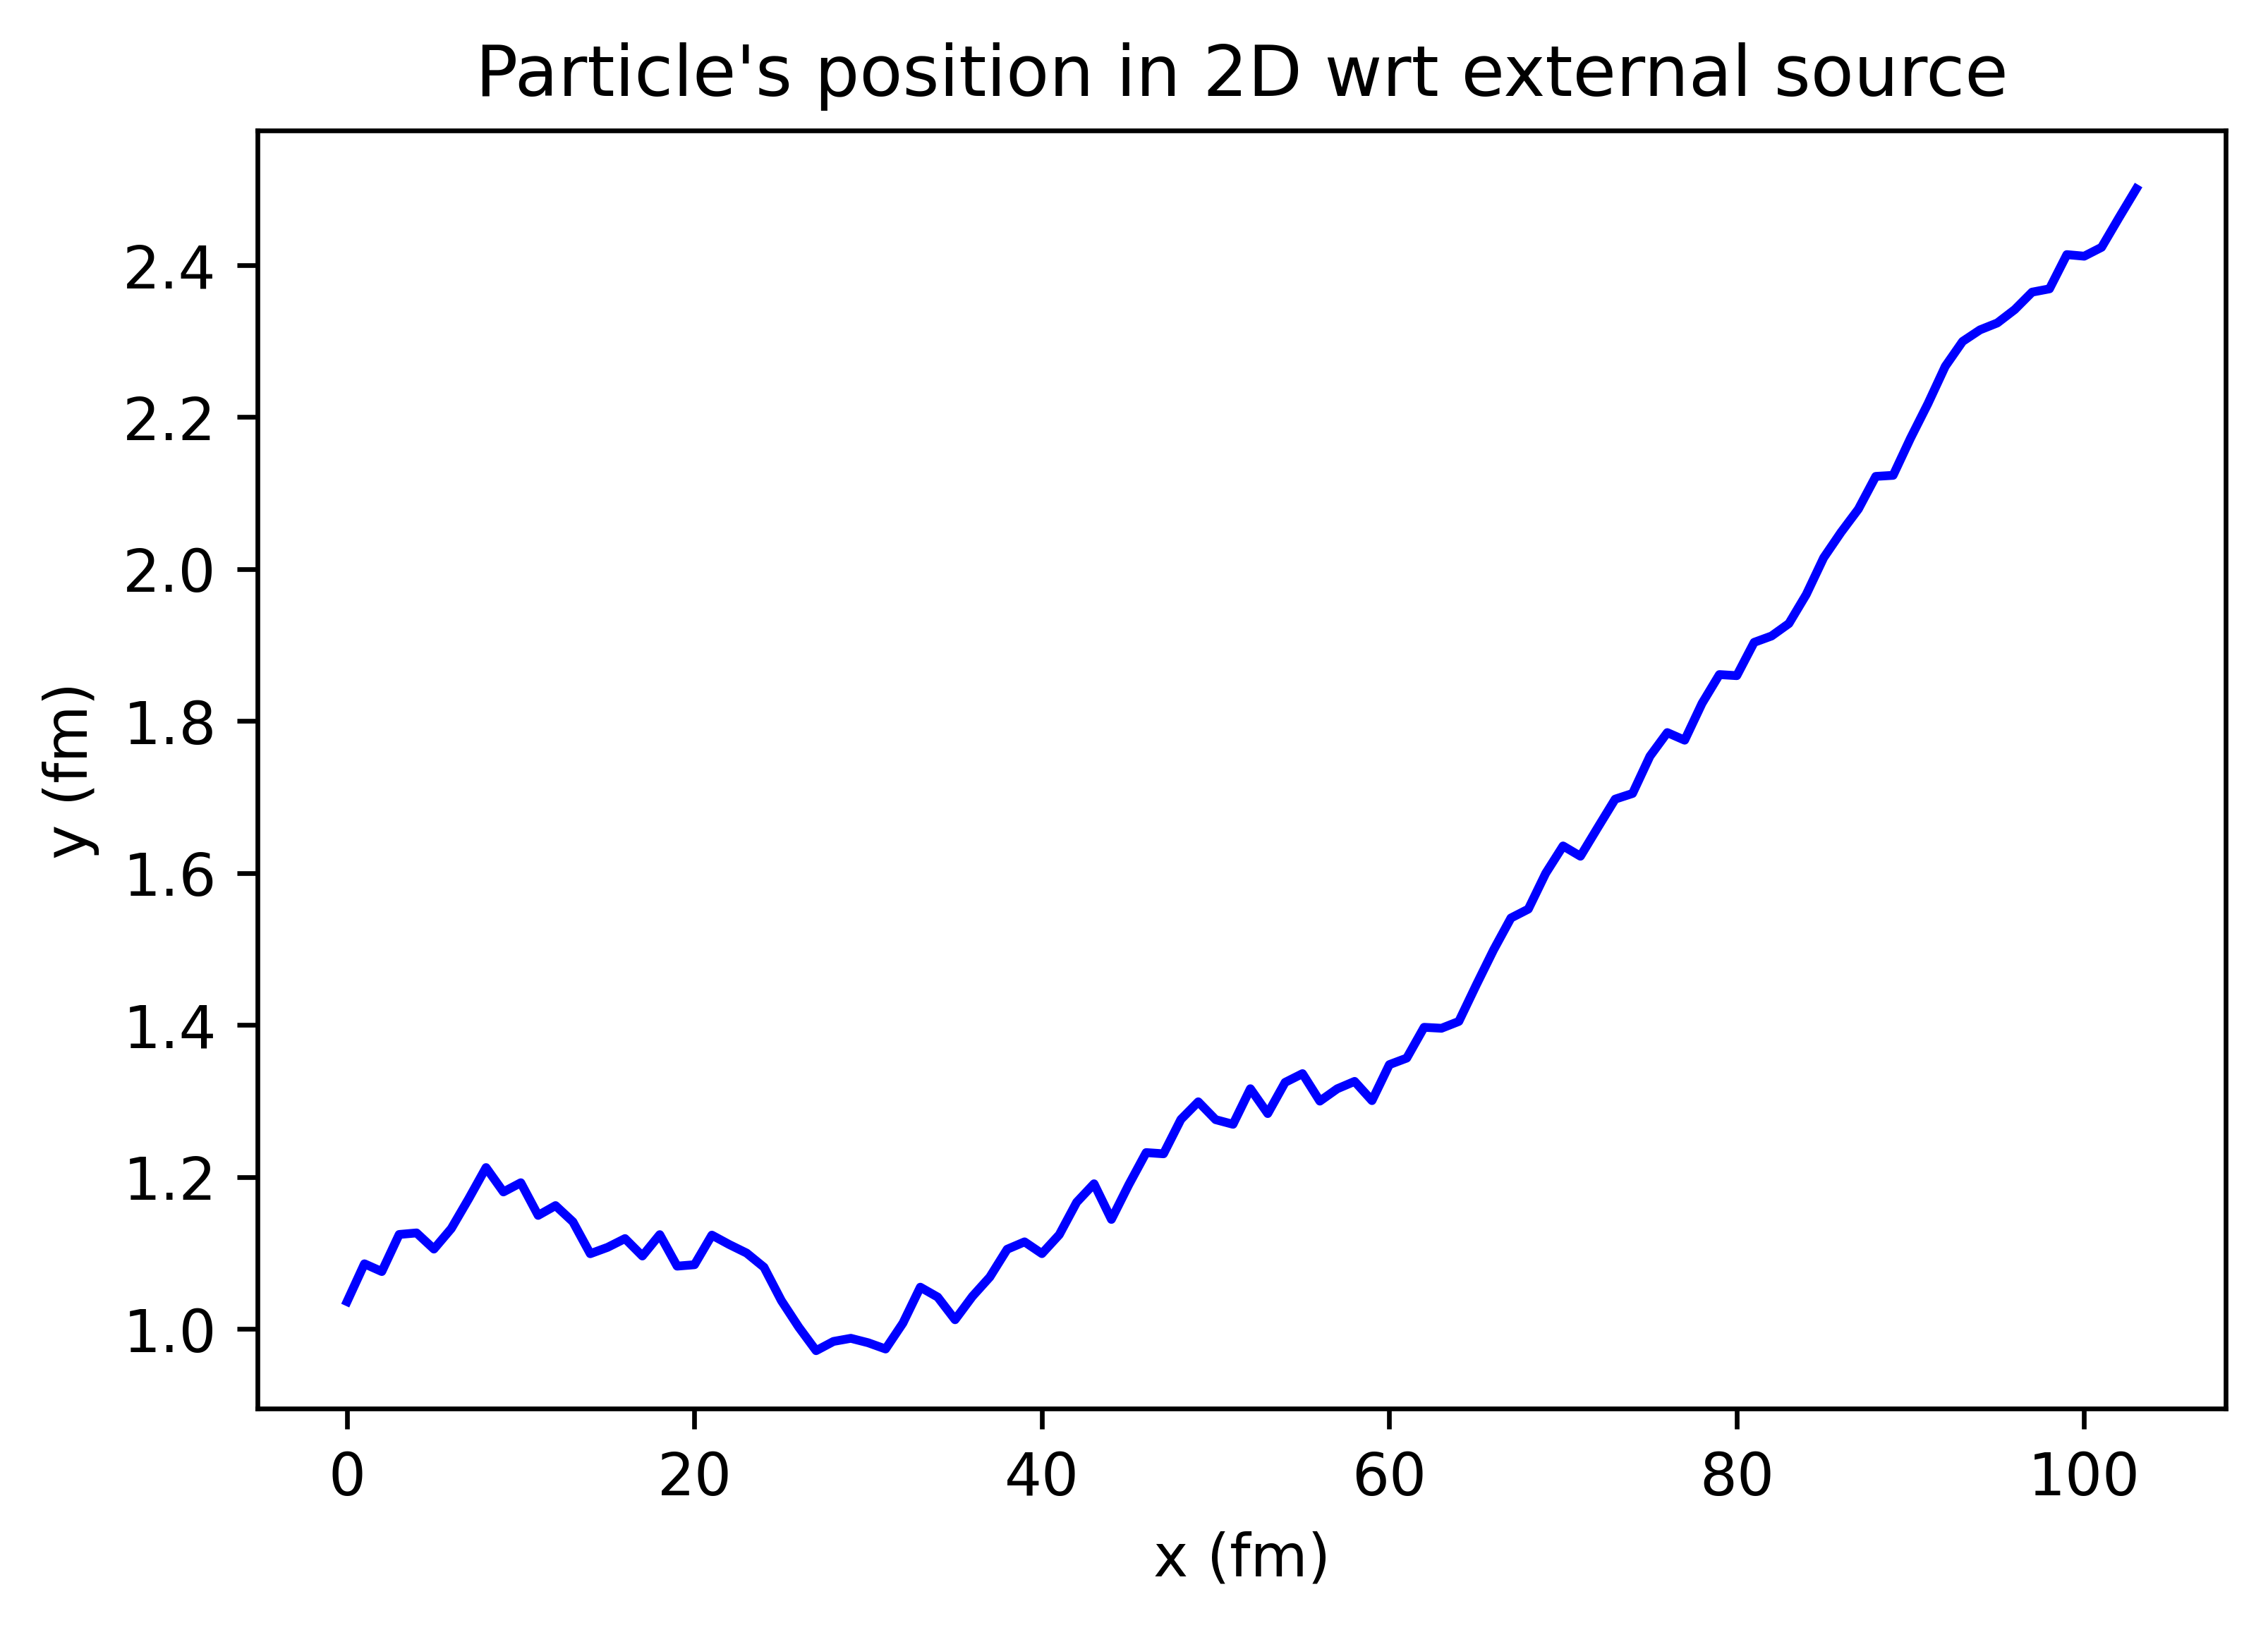

In [39]:
#-----Done by nico

fig, ax = plt.subplots(dpi=600)
variable2=[]
for i in range(0,len(list_beta)):
    variable2.append(i)
ax.plot(variable2,list_beta, 'blue')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
plt.title("Particle's position in 2D wrt external source")
plt.show()

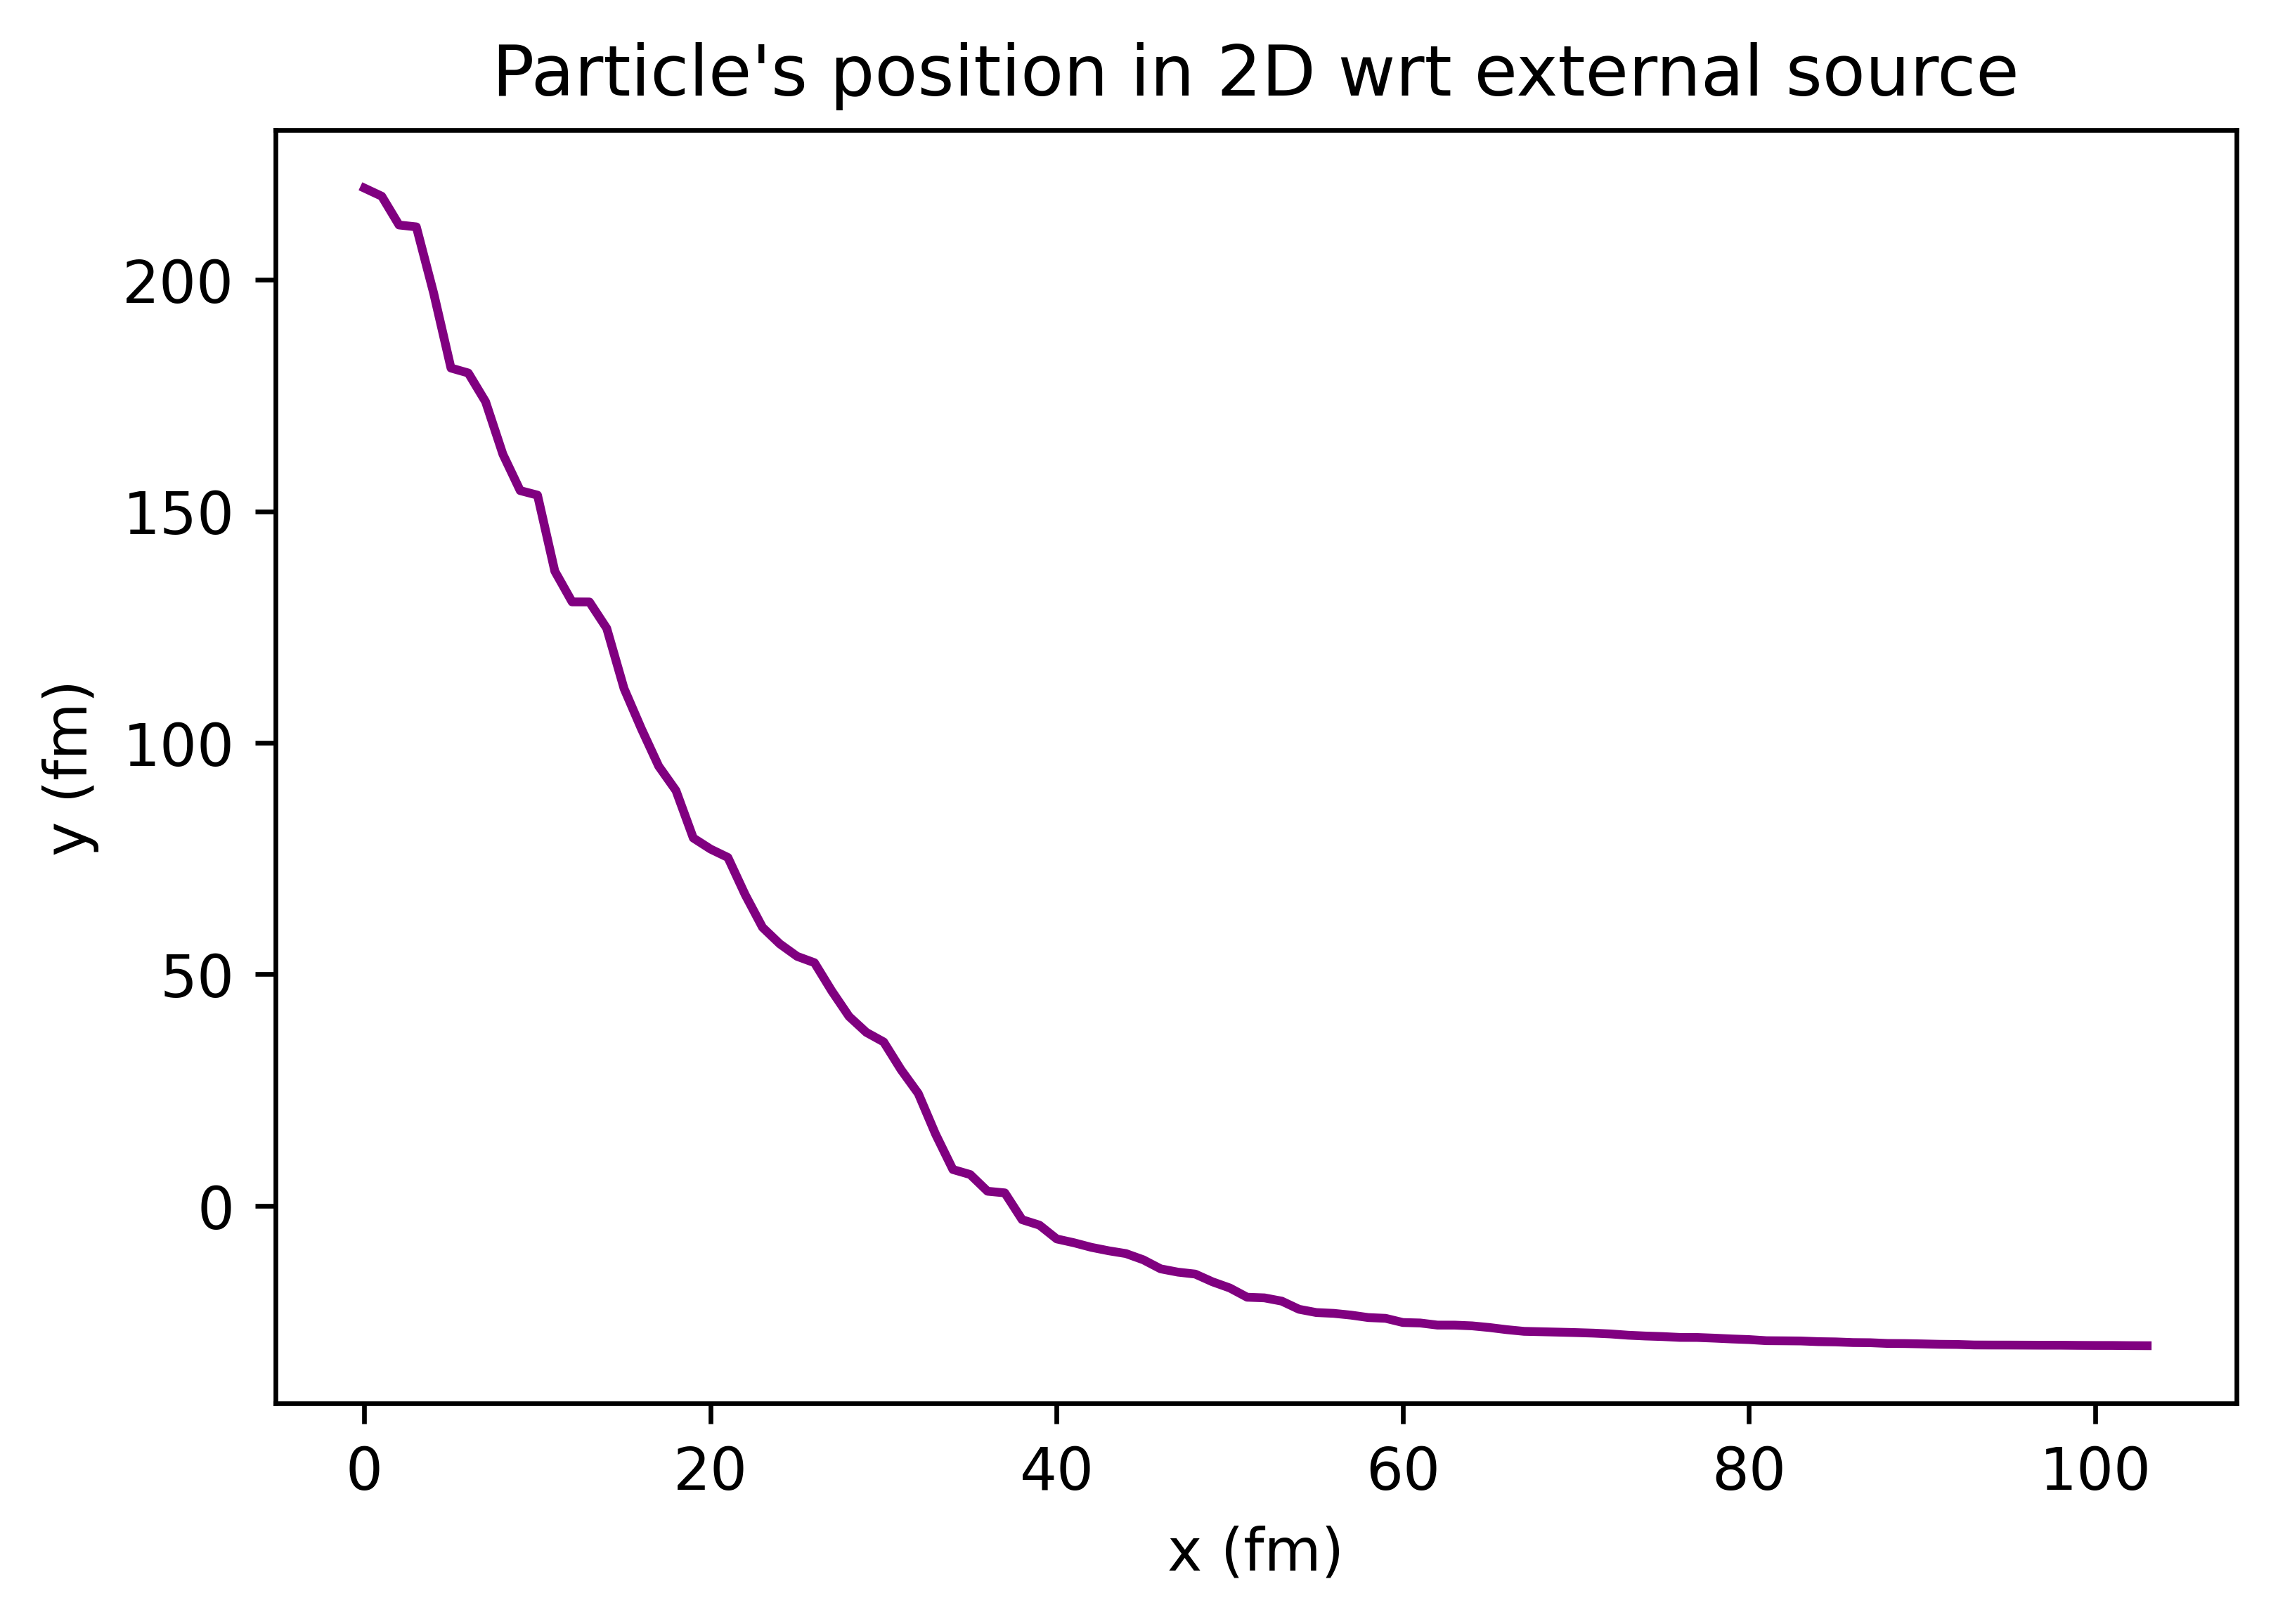

In [40]:
#-----Done by nico

fig, ax = plt.subplots( dpi=600)
variable3=[]
for i in range(0,len(list_E)):
    variable3.append(i)
ax.plot(variable3,list_E, color='purple')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
plt.title("Particle's position in 2D wrt external source")
plt.show()

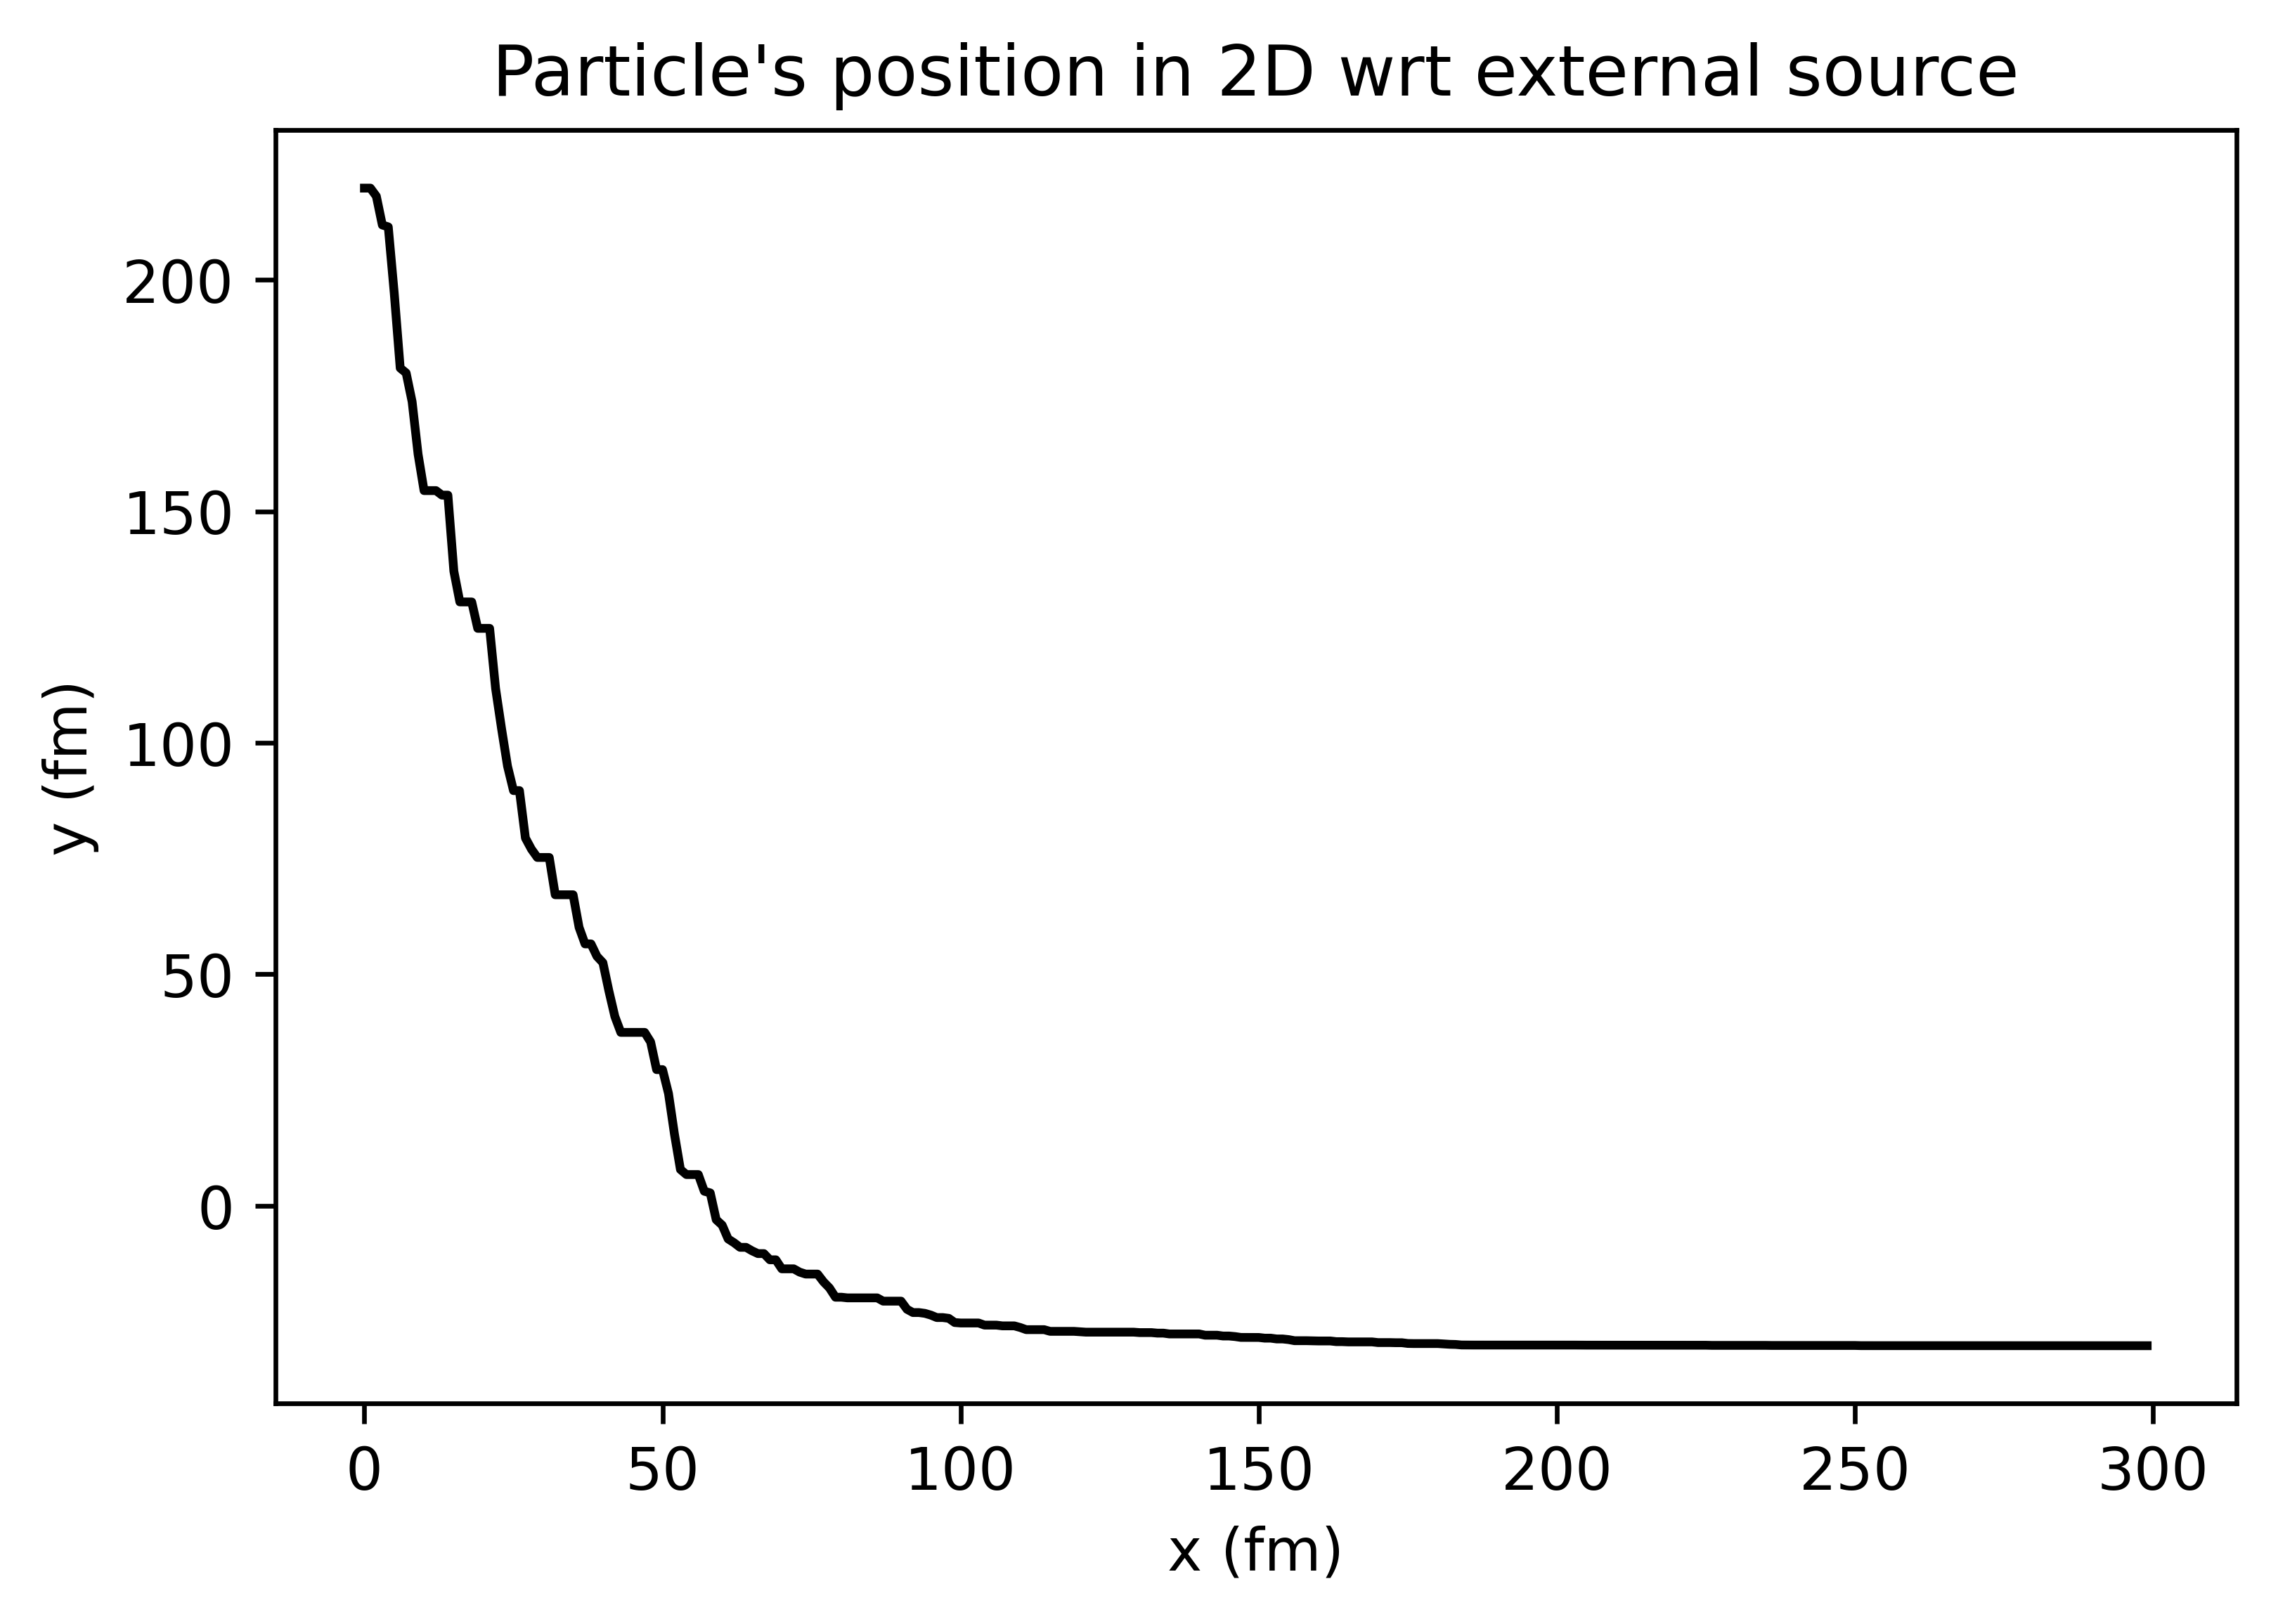

In [41]:
#-----Done by nico

fig, ax = plt.subplots( dpi=600)
variable4=[]
for i in range(0,len(list_EvalE)):
    variable4.append(i)
ax.plot(variable4,list_EvalE, color='black')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
plt.title("Particle's position in 2D wrt external source")
plt.show()

TypeError: object of type 'numpy.float64' has no len()

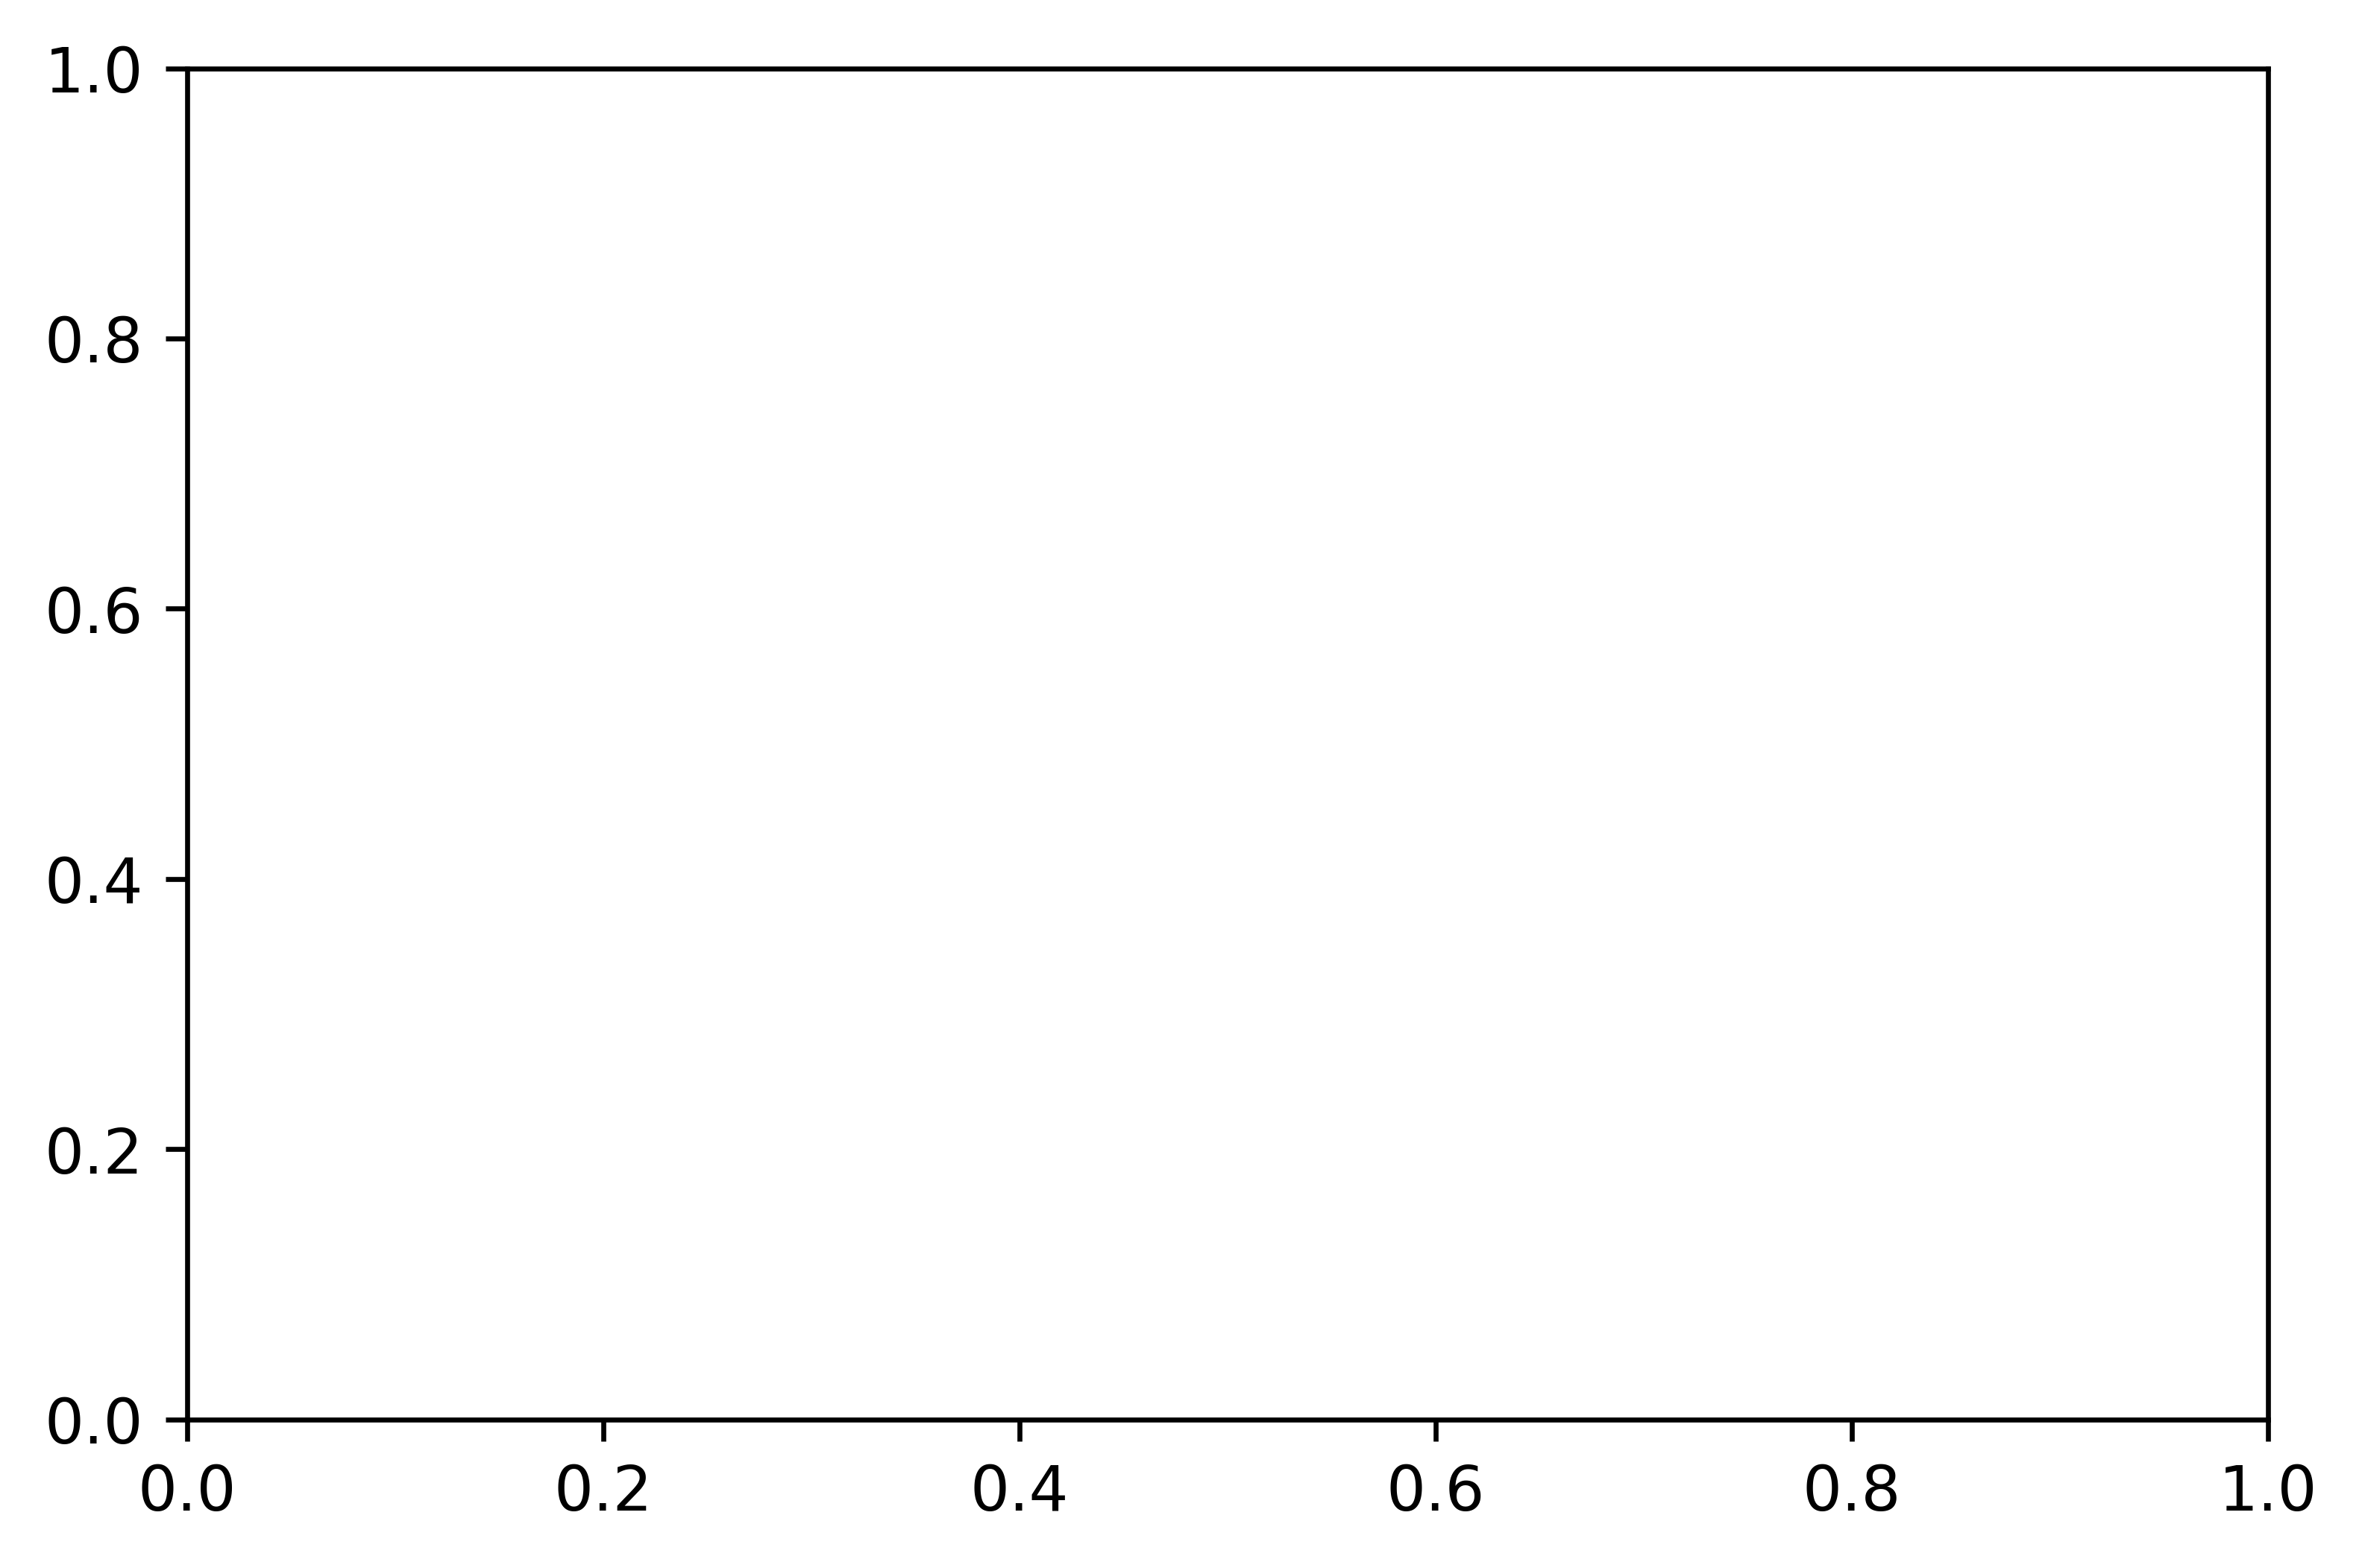

In [42]:
#-----Done by nico

fig, ax = plt.subplots( dpi=600)
variable5=[]
for i in range(0,len(Par_new[0])):
    variable5.append(i)
ax.plot(variable5,Par_new[0], color='black')
ax.set_xlabel('x (fm)')
ax.set_ylabel('y (fm)')
plt.title("Particle's position in 2D wrt external source")
plt.show()